In [48]:
import pandas as pd

Df = pd.read_csv("../../membershipchainservice/Data/messages.txt")



In [76]:
Df["nb Nodes"] = Df[" epoch"].apply(lambda epoch : max(4,2+epoch*2))
Df

,Name,Function,nb_messages,epoch,nb Nodes
0,node_3,SignatureRequest,4,0,4
1,node_1,SignatureRequest,4,0,4
2,node_0,SignatureRequest,4,0,4
3,node_2,SignatureRequest,4,0,4
4,node_3,CreateProofForEpoch,4,0,4
...,...,...,...,...,...
353,node_10,AgreeOnState,20,9,20
354,node_9,AgreeOnState,20,9,20
355,node_16,AgreeOnState,20,9,20
356,node_6,AgreeOnState,20,9,20


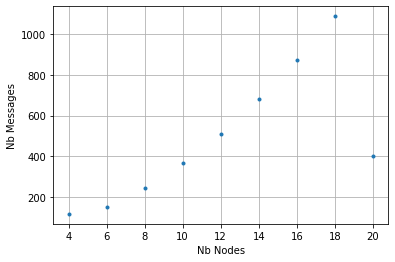

In [97]:
import matplotlib.pyplot as plt

sums = Df.groupby("nb Nodes").sum()
plt.plot(sums[" nb_messages"], ".")
plt.grid(True)
plt.ylabel("Nb Messages")
plt.xlabel("Nb Nodes")


plt.savefig("../../latex/thesis_template/figures/messages-plot.pdf")